<a href="https://colab.research.google.com/github/HenrySomeCode/Classify-images-of-clothing-using-fully-connected-neural-network/blob/main/Classify_images_of_clothing_using_fully_connected_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: 
* https://www.tensorflow.org/tutorials/keras/classification


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.12.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data( )

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Analyze the data

What's the data struture ?

In [5]:
# The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
# 60000 images in training dataset, each is 28x28 in width and height, 
# channel is 1 (gray images)
train_images.shape

(60000, 28, 28)

In [7]:
# 60000 labels in training dataset
len(train_labels)

60000

In [8]:
# each label is an interger between 0 and 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
#There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels
test_images.shape

(10000, 28, 28)

In [10]:
# And the test set contains 10,000 images labels
len(test_labels)

10000

Visualization

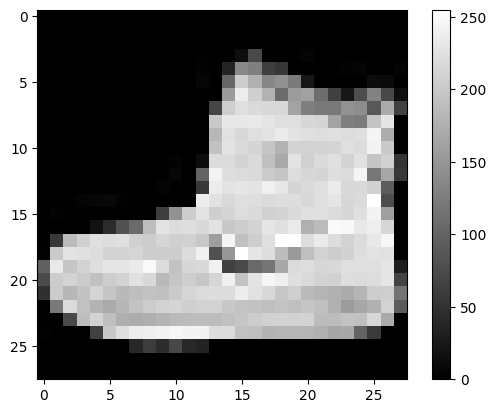

In [11]:
plt.figure()
plt.imshow(train_images[0], cmap ='gray')
plt.colorbar()
plt.grid(False)
plt.show()

Preprocessing

In [12]:
#MinMaxscale
train_images = train_images / 255.0

test_images = test_images / 255.0

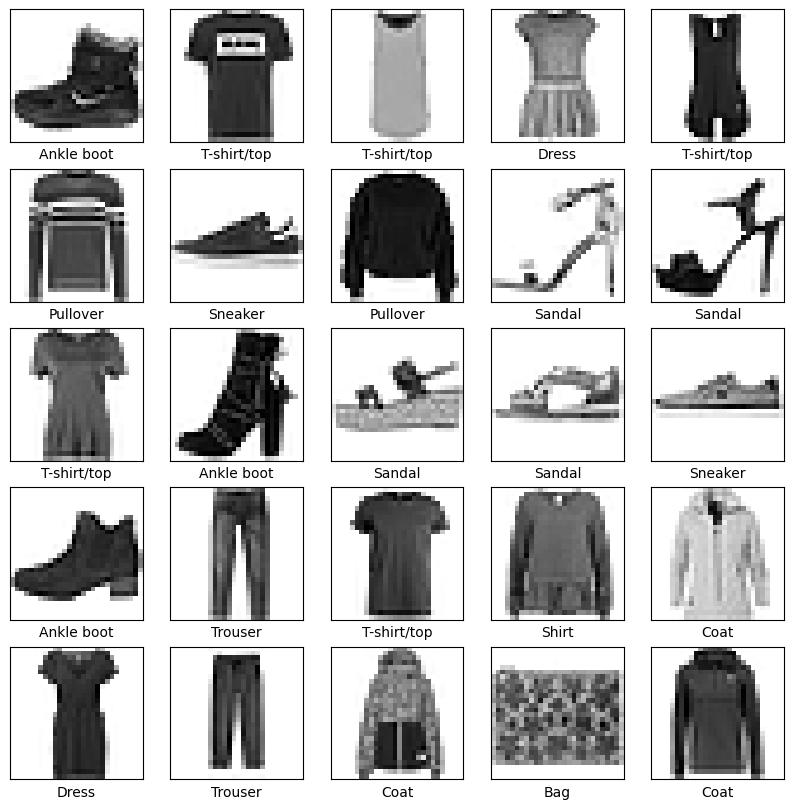

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Build the model

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

About categorical cross entropy :

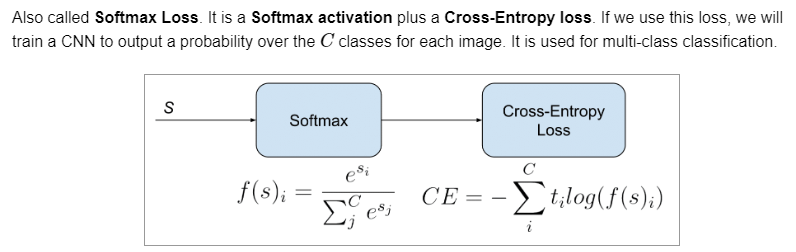

Besides, here is binary cross entropy :

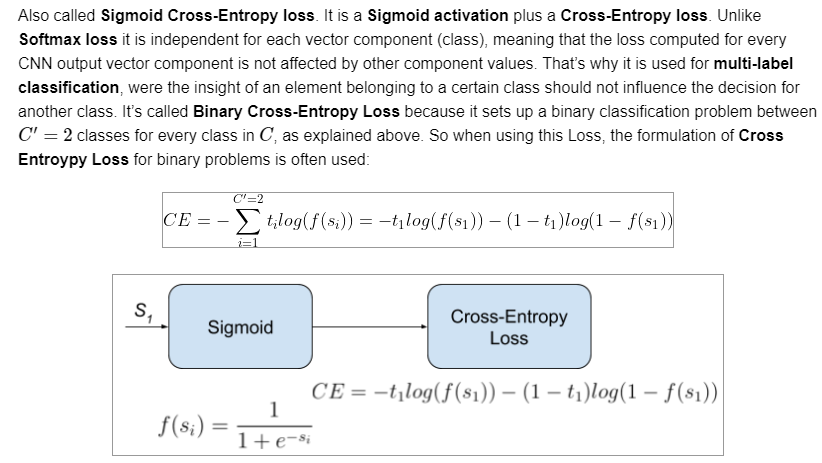

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4982 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3760 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3368 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3134 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2966 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2827 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2713 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2592 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2501 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.241

In [17]:
# acc: (tp+tn)/(tp+tn+fp+fn)
# loss: categorical cross entropy loss
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3447 - accuracy: 0.8808 - 655ms/epoch - 2ms/step

Test accuracy: 0.8808000087738037


Make predictions

In [18]:
# Adding a softmax layer to convert the model's outputs, also called logits, to probabilities
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [20]:
predictions[0]

array([1.4562770e-06, 7.6365518e-09, 3.5296546e-06, 3.0247526e-05,
       6.1914852e-07, 1.1821933e-02, 1.6694110e-05, 1.9048944e-02,
       1.1314769e-06, 9.6907544e-01], dtype=float32)

In [21]:
# numpy.argmax: returns the index of the maximum value along an axis.
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

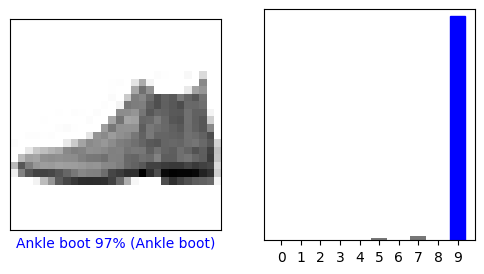

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

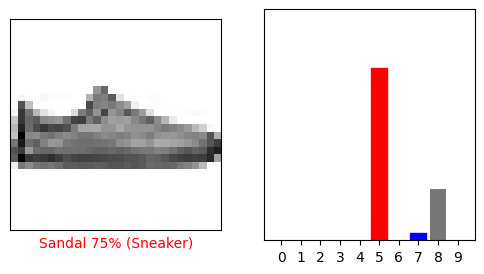

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

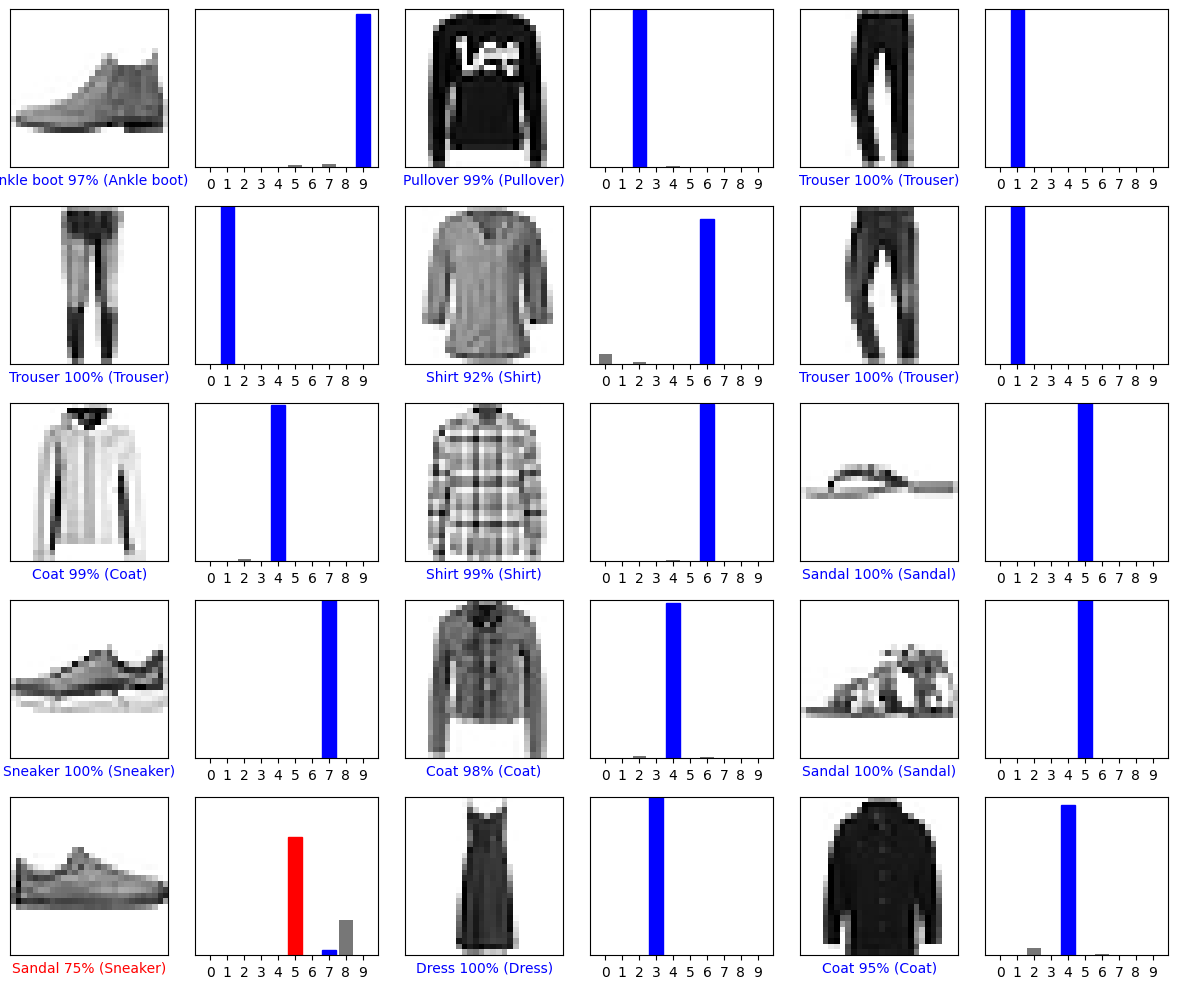

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


Use the trained model to make prediction on a single image. This is kinda weird in the first time since tf.keras models are designed to make prediction on batch, means many images at once. So eventhough, I'm using a single image, I need to add it to a list :

In [27]:
img = test_images[1]
# np.expand_dims : insert a new axis that will appear at the axis position in the expended array shape
# '0' in np.expand_dims(img,0) means the position of the new axis
img = (np.expand_dims(img,0))

In [28]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[1.3217780e-06 2.1385390e-13 9.9440199e-01 2.7474696e-12 5.2954438e-03
  2.0715100e-13 3.0126120e-04 2.8555880e-19 3.6249588e-12 6.6683802e-18]]


In [33]:
np.argmax(predictions_single[0])

2

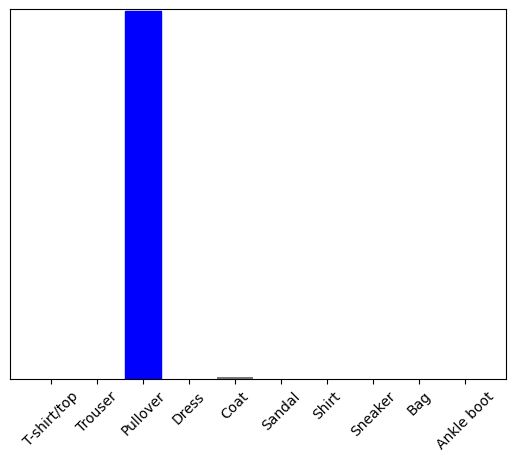

In [32]:
plot_value_array(1, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()